In [ ]:
from fastai.vision import *

In [ ]:
from fastai import __version__
print(__version__)

2.2.7


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/cars_train/train/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/cars_train/train/train/Car/000144_01.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000192_11.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000213_17.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000175_05.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000191_16.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000202_19.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000178_02.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000149_18.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000165_09.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000149_01.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000199_17.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000146_02.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000187_05.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000154_02.jpg
/content/drive/MyDrive/cars_train/train/train/Car/000

In [ ]:
from fastai.vision import *

In [ ]:
def folder_name(number):
    if(len(str(number))==6):
        return number
    gap = 6 - len(str(number))
    return gap *'0' + str(number)
def from_preds_to_list(preds):
    p=to_np(preds)
    lista =[]
    for i in range(len(p)):
        lista.append(np.where(np.amax(p[i])==p[i])[0][0])
    last=[]
    for element in lista:
        last.append(data.classes[element])
    return last

In [ ]:
path="/content/drive/MyDrive/cars_train/train/train/"
np.random.seed(42)
data = ImageDataBunch.from_folder(path+'.', train=path+'.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packa

In [ ]:
len(data.classes)

4

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

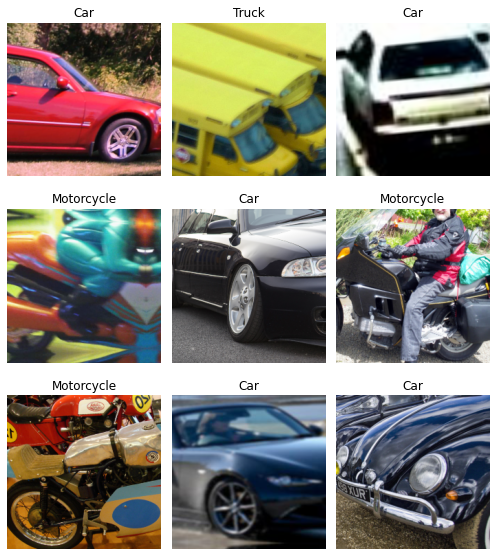

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet50, metrics=error_rate,model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.403163,0.263348,0.086258,1:57:41


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default

In [ ]:
learn.model_dir='/content/drive/MyDrive/cars_train/'
learn.export("/content/drive/MyDrive/cars_train/vehicle.ox")

In [ ]:
pred = learn.predict((open_image('/content/drive/MyDrive/cars_train/train/train/Screenshot_4.png')));

In [ ]:
img = open_image('/content/drive/MyDrive/cars_train/train/train/Screenshot_4.png'

In [ ]:
pred

(Category tensor(1),
 tensor(1),
 tensor([6.1843e-04, 9.9544e-01, 4.0051e-05, 3.9018e-03]))

In [ ]:
onnx_output = torch.onnx._export(learn, torch_input, MODELS/f'{arch_name}.onnx', verbose=False)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.save('final_model')

In [ ]:


torch.onnx.export(learn.model, torch.randn(1, 3, 224, 224), "vehicle_classification.onnx")